In [1]:
# Module importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Daten in Pandas einlesen
data = pd.read_csv("employees-1636985761.csv")
data.shape

(8336, 13)

In [3]:
# Checken, ob AbsentHours (x) 0 Werte hat. 
data[data["AbsentHours"] != 0]

# Gender Spalte, 
data["Gender"] = data["Gender"].map({"F":0,"M":1})
data

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,0,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,1,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,1,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,0,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,1,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,0,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,1,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,0,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,0,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


In [4]:
# x und y - Werte definieren
x = data["AbsentHours"].astype(float).values.reshape(-1,1)
y = data["Gender"].astype(float).values

# Train und Test Datensatz erstellen
train, test = train_test_split(data, test_size = 0.3)

# x_train/x_test filtern
x_train = train["AbsentHours"].values.reshape(-1,1)
y_train = train["Gender"].values

x_test = test["AbsentHours"].values.reshape(-1,1)
y_test = test["Gender"].values

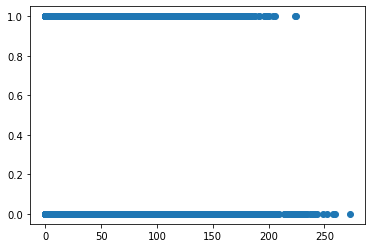

In [5]:
# Einfacher Scatterplot
plt.scatter(x,y)
plt.show()

In [6]:
# Logistisches Modell mit Trainingsdaten erstellen
model = LogisticRegression().fit(x_train, y_train)

In [7]:
# Confusions Matrix erstellen
y_predict_test = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predict_test)
print(conf_matrix)

# True Positiv und True Negativ -> Rictige Werte!
true_positiv = conf_matrix[0][0]
true_negativ = conf_matrix[1][1]

# Falsche predictete Werte
false_negativ = conf_matrix[0][1]
false_positiv = conf_matrix[1][0]

# Model Bewertung
# Richtige Werte:
richtig = int(true_positiv) + int(true_negativ)

# Falsche Werte
falsch = int(false_negativ) + int(false_positiv)

falsch_klassifiziert = falsch / (falsch + richtig) * 100
print("Das Modell gibt mir zu:", round(falsch_klassifiziert, 1), "% einen falsche Vorhersage!")

[[559 708]
 [417 817]]
Das Modell gibt mir zu: 45.0 % einen falsche Vorhersage!


In [8]:
# x_values definieren 
x_values = np.linspace(-500,500,1000).reshape(-1,1)

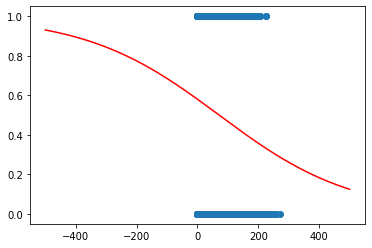

In [9]:
# Logisischte Regression 
plt.scatter(x, y)
plt.plot(x_values, model.predict_proba(x_values)[:,1], c = "r")
plt.show()